# Demo - Compare sensitivity curves

In [1]:
%matplotlib inline

Let's import the evolution functions and also some other common stuff.

In [2]:
import legwork as lw
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)

## Sensitivity curve comparisons

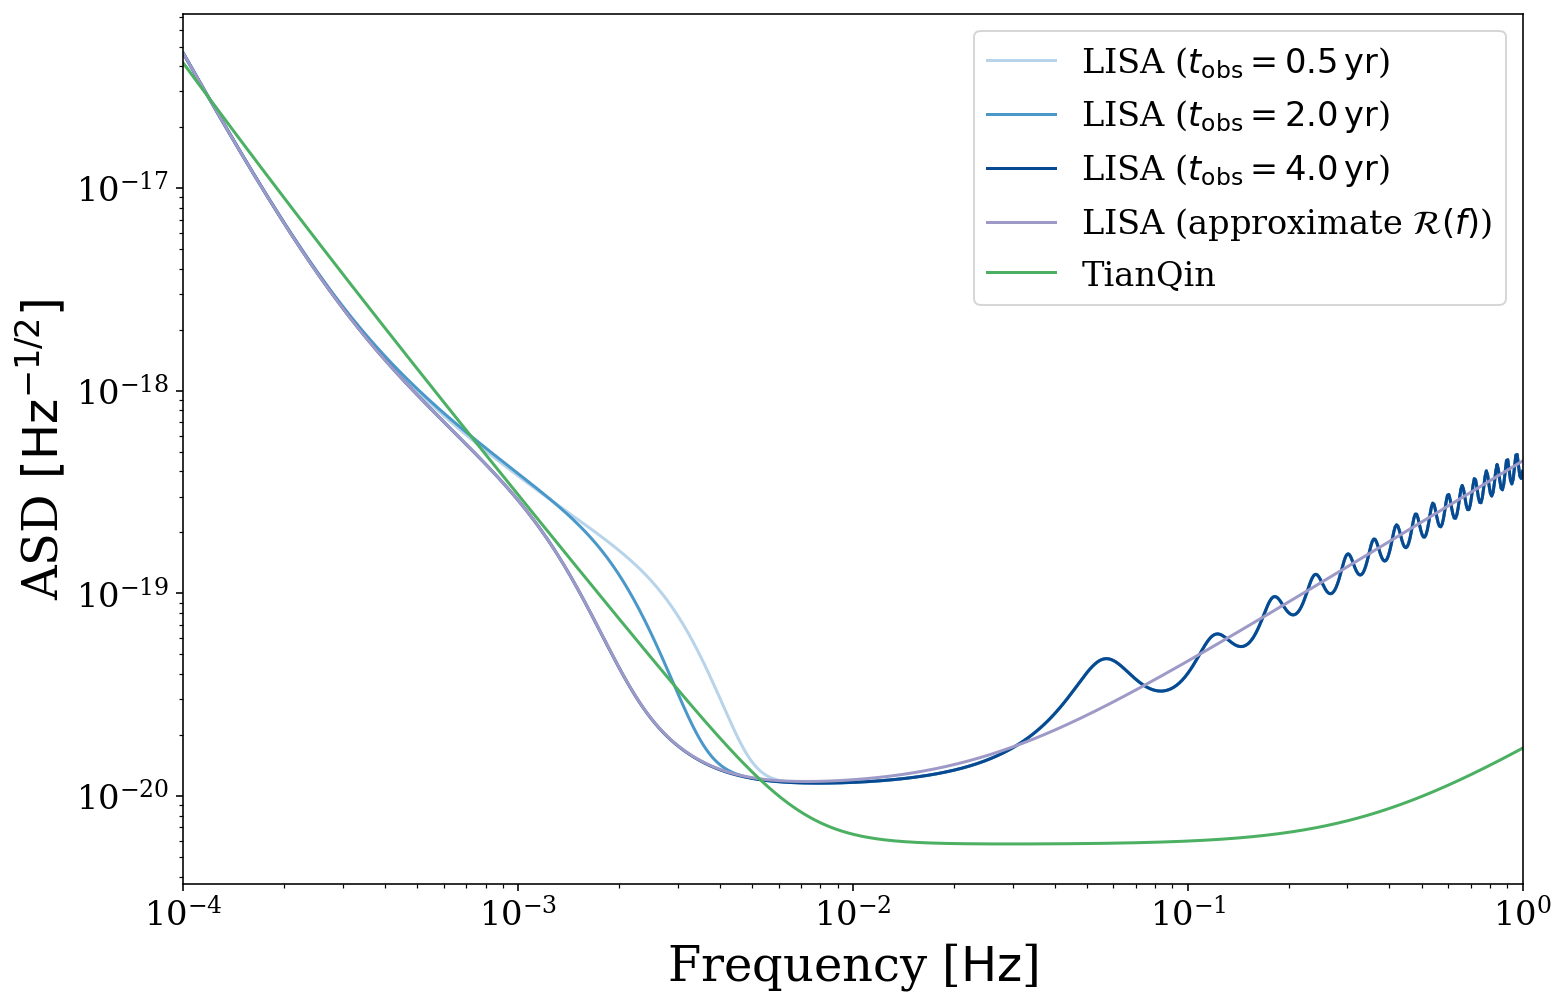

In [108]:
fig, ax = plt.subplots()

fr = np.logspace(-4, 0, 1000) * u.Hz

for i, t_obs in enumerate([0.5, 2.0, 4.0]):
    lw.visualisation.plot_sensitivity_curve(frequency_range=fr, t_obs=t_obs * u.yr,
                                            fig=fig, ax=ax, show=False, fill=False,
                                            color=plt.get_cmap("Blues")((i + 1) * 0.3),
                                            label=r"LISA ($t_{{\rm obs}} = {{{}}} \, {{\rm yr}}$)".format(t_obs))
    
lw.visualisation.plot_sensitivity_curve(frequency_range=fr, approximate_R=True,
                                        fig=fig, ax=ax, show=False, fill=False,
                                        color=plt.get_cmap("Purples")(0.5),
                                        label=r"LISA (approximate $\mathcal{R}(f)$)")
    
lw.visualisation.plot_sensitivity_curve(frequency_range=fr, instrument="TianQin", label="TianQin",
                                        fig=fig, ax=ax, show=False,
                                        color=plt.get_cmap("Greens")(0.6), fill=False)
    
ax.legend(fontsize=0.7*fs)

plt.show()

## SNR in different detectors

In [19]:
f_orb_s = np.logspace(-4, -1, 75) * u.Hz
ecc_s = np.linspace(0, 0.9, 50)
F, E = np.meshgrid(f_orb_s, ecc_s)

F_flat, E_flat = F.flatten(), E.flatten()

m_1 = np.repeat(10, len(F_flat)) * u.Msun
m_2 = np.repeat(10, len(F_flat)) * u.Msun
dist = np.repeat(8, len(F_flat)) * u.kpc

sources_LISA = lw.source.Source(m_1=m_1, m_2=m_2, f_orb=F_flat, ecc=E_flat, dist=dist, gw_lum_tol=1e-3)
sources_TQ = lw.source.Source(m_1=m_1, m_2=m_2, f_orb=F_flat, ecc=E_flat, dist=dist,
                              sc_params={"instrument": "TianQin", "L": None}, gw_lum_tol=1e-3)

In [20]:
LISA_snr = sources_LISA.get_snr(verbose=True)

Calculating SNR for 3750 sources
	1680 sources are stationary
		41 sources are stationary and circular
		1639 sources are stationary and eccentric
	2070 sources are evolving
		34 sources are evolving and circular
		2036 sources are evolving and eccentric


In [21]:
TQ_snr = sources_TQ.get_snr(verbose=True)

Calculating SNR for 3750 sources
	1680 sources are stationary
		41 sources are stationary and circular
		1639 sources are stationary and eccentric
	2070 sources are evolving
		34 sources are evolving and circular
		2036 sources are evolving and eccentric


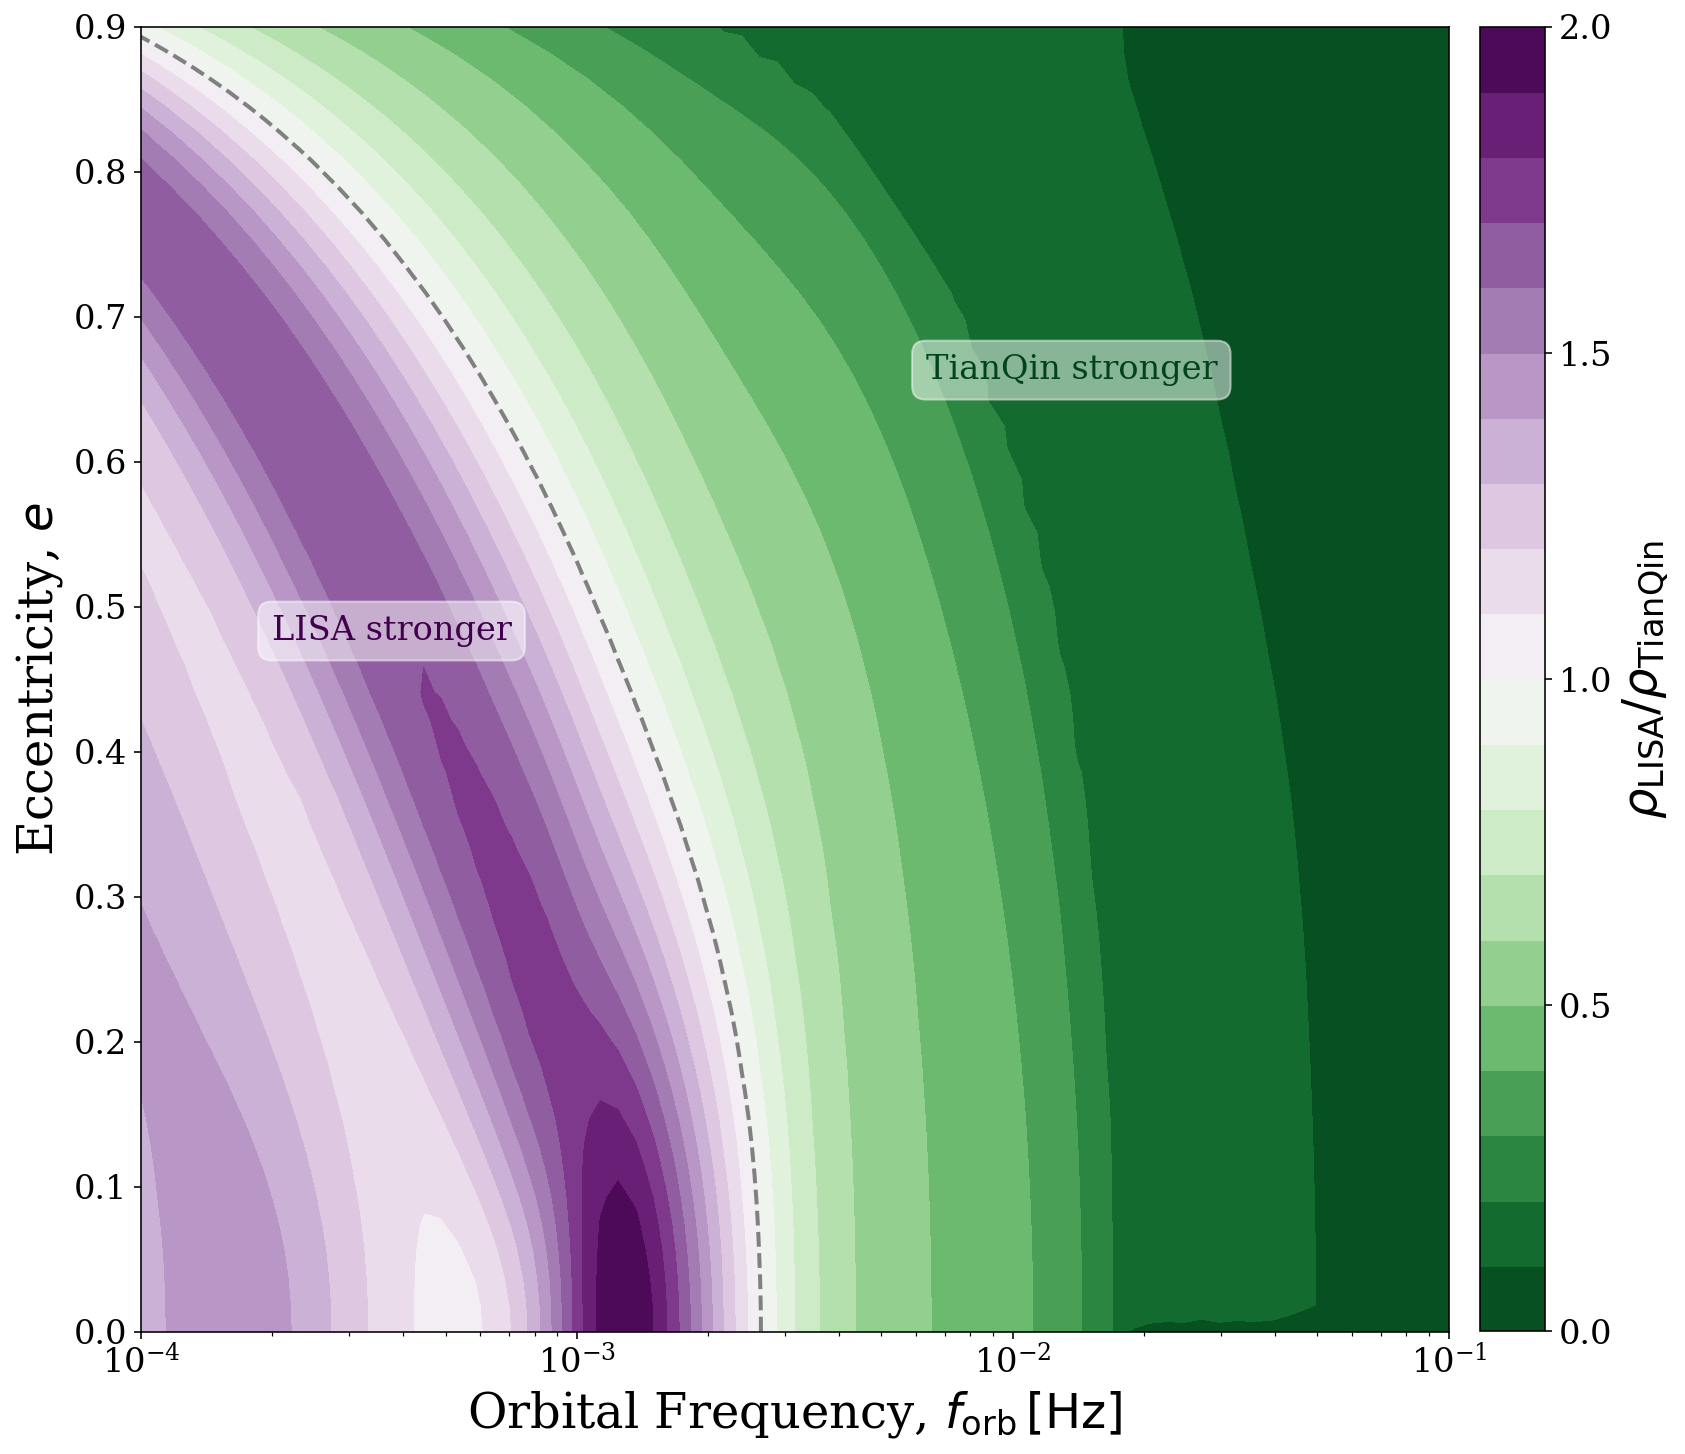

In [64]:
fig, ax = plt.subplots(figsize=(14, 12))

ax.set_xscale("log")
ax.set_xlabel(r"Orbital Frequency, $f_{\rm orb} \, [{\rm Hz}]$")
ax.set_ylabel(r"Eccentricity, $e$")

ratio_cont = ax.contourf(F, E, (LISA_snr / TQ_snr).reshape(F.shape), cmap="PRGn_r",
                         norm=TwoSlopeNorm(vcenter=1.0, vmin=0.0, vmax=2.0), levels=20)
ax.contour(F, E, (LISA_snr / TQ_snr).reshape(F.shape), levels=[1.0], colors="grey", linewidths=2.0, linestyles="--")
cbar = fig.colorbar(ratio_cont, fraction=2/14, pad=0.02,
                    label=r"$\rho_{\rm LISA} / \rho_{\rm TianQin}$",
                    ticks=np.arange(0, 2 + 0.5, 0.5))


# annotate which regions suite each detector
ax.annotate("LISA stronger", xy=(0.1, 0.53), xycoords="axes fraction", fontsize=0.7 * fs,
            color=plt.get_cmap("PRGn_r")(1.0),
            bbox=dict(boxstyle="round", facecolor="white", edgecolor="white", alpha=0.5, pad=0.4))
ax.annotate("TianQin stronger", xy=(0.6, 0.73), xycoords="axes fraction", fontsize=0.7 * fs,
            color=plt.get_cmap("PRGn_r")(0.0),
            bbox=dict(boxstyle="round", facecolor="white", edgecolor="white", alpha=0.5, pad=0.4))

plt.show()